In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

#### Dataset

In [ ]:
file=pd.read_csv("Churn_Modelling.csv")
df=pd.DataFrame(file)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['HasCrCard'] = df['HasCrCard'].astype('category')

In [ ]:
df['IsActiveMember'] = df['IsActiveMember'].astype('category')
df['Exited'] = df['Exited'].astype('category')

In [ ]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Visualizations

####  Uni-variate analysis

0    7963
1    2037
Name: Exited, dtype: int64

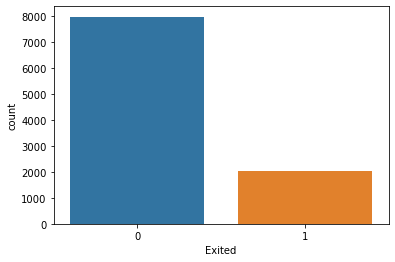

In [ ]:
sns.countplot(x=df['Exited'])
df['Exited'].value_counts()

<AxesSubplot:ylabel='Gender'>

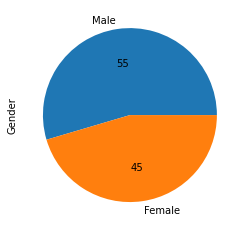

In [ ]:
df['Gender'].value_counts().plot(kind='pie', autopct='%.0f')

#### Bi-variate analysis

<AxesSubplot:xlabel='CreditScore', ylabel='Balance'>

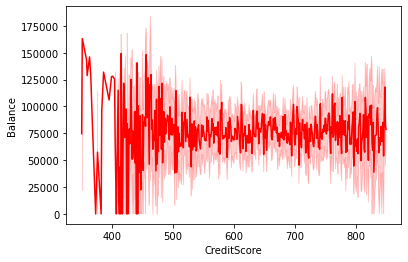

In [ ]:
sns.lineplot(x=df['CreditScore'],y=df['Balance'],color='red')

#### Multi-variate analysis

<AxesSubplot:xlabel='Age', ylabel='Exited'>

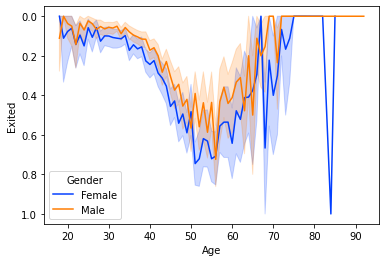

In [ ]:
sns.lineplot( x="Age", y="Exited", data=df, palette='bright', hue='Gender')

#### Descriptive statistics 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  object  
 2   Gender           10000 non-null  object  
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  category
dtypes: category(3), float64(2), int64(4), object(2)
memory usage: 654.8+ KB


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [ ]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.mean(numeric_only=True)

CreditScore           650.528800
Age                    38.921800
Tenure                  5.012800
Balance             76485.889288
NumOfProducts           1.530200
EstimatedSalary    100090.239881
dtype: float64

In [ ]:
df.median(numeric_only=True)

CreditScore           652.000
Age                    37.000
Tenure                  5.000
Balance             97198.540
NumOfProducts           1.000
EstimatedSalary    100193.915
dtype: float64

In [ ]:
df.mode(numeric_only=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,850,37,2,0.0,1,24924.92


#### Handling missing values

In [ ]:
df.notnull()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
9995,True,True,True,True,True,True,True,True,True,True,True
9996,True,True,True,True,True,True,True,True,True,True,True
9997,True,True,True,True,True,True,True,True,True,True,True
9998,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
df.fillna(0)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.fillna(method='pad')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.fillna(method='bfill')


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#### Finding outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

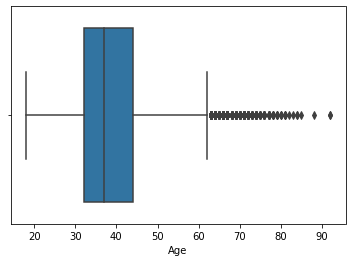

In [ ]:
sns.boxplot(df.Age)

In [ ]:
df.shape

(10000, 11)

In [ ]:
q1 = df.Age.quantile(0.25)
q3 = df.Age.quantile(0.75)
IQR=q3-q1

In [ ]:
IQR

12.0

In [ ]:
upper_limit= q3+1.5*IQR
lower_limit= q1-1.5*IQR

In [ ]:
upper_limit

62.0

In [ ]:
lower_limit

14.0

In [ ]:
df1=df[df.Age<upper_limit]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

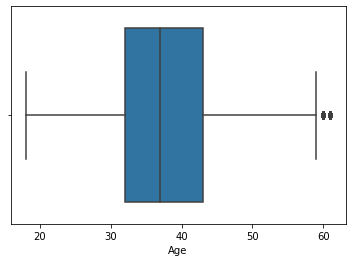

In [ ]:
sns.boxplot(df1.Age)

#### Categorical columns and encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df["Age"]= le.fit_transform(df["Age"]) 
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,24,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,23,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,24,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,21,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,25,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,21,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,17,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,18,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,24,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.004017,0.000842,0.006268,0.012238,-0.001384
Age,-0.004017,1.000000,-0.009936,0.028275,-0.030707,-0.007214
Tenure,0.000842,-0.009936,1.000000,-0.012254,0.013444,0.007784
Balance,0.006268,0.028275,-0.012254,1.000000,-0.304180,0.012797
NumOfProducts,0.012238,-0.030707,0.013444,-0.304180,1.000000,0.014204
EstimatedSalary,-0.001384,-0.007214,0.007784,0.012797,0.014204,1.000000


#### Splitting data into dependent and independent variables

In [ ]:
x=df.iloc[:,:-1]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,24,2,0.00,1,1,1,101348.88
1,608,Spain,Female,23,1,83807.86,1,0,1,112542.58
2,502,France,Female,24,8,159660.80,3,1,0,113931.57
3,699,France,Female,21,1,0.00,2,0,0,93826.63
4,850,Spain,Female,25,2,125510.82,1,1,1,79084.10


In [ ]:
y=df.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: category
Categories (2, int64): [0, 1]

#### Scaling independent variables

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
credit_score=df[["CreditScore","EstimatedSalary"]]

In [ ]:
scaler=StandardScaler()
scaler.fit(credit_score)

StandardScaler()

In [ ]:
credit_score

,CreditScore,EstimatedSalary
0,619,101348.88
1,608,112542.58
2,502,113931.57
3,699,93826.63
4,850,79084.10
...,...,...
9995,771,96270.64
9996,516,101699.77
9997,709,42085.58
9998,772,92888.52


#### Splitting data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.33)

In [ ]:
x_train.shape

(6700, 10)

In [ ]:
x_test.shape

(3300, 10)

In [ ]:
y_train.shape

(6700,)

In [ ]:
y_test.shape

(3300,)